# Testes Estatísticos: Analisando suplementos vitamínicos em porcos da Guiné

Esse dataset contém um conjunto de registros com informações sobre o comprimento dos  dentes  de  Porcos  da  Guiné.  Pesquisadores  ministraram  diferentes  doses  de 2  tipos  de suplementos vitamínicos em 60 porquinhos e avaliaram o resultadono crescimento dos dentes dos animais.

>Há diferença significativa no crescimento dos dentes de acordo com o tipo de suplemento usado nos Porcos da Guiné?

**Referências:** Formação Cientista de Dados (https://www.datascienceacademy.com.br/)

In [ ]:
options(scipen = 999, digits = 2,
        repos = 'http://cran.rstudio.com/',
        repr.plot.width = 20,
        repr.plot.height = 10)

In [ ]:
if(!require(pacman)) install.packages('pacman')
library('pacman')
pacman::p_load(data.table, dplyr, corrplot, ggplot2, GGally)

In [3]:
# Importando o conjunto de dados
df <- read.csv('/content/ToothGrowth.csv')

In [4]:
# Verificando as primeiras linhas
head(df)

,len,supp,dose
,<dbl>,<chr>,<dbl>
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5


In [5]:
# Verificando as dimensões
dim(df)

[1] 60  3

In [10]:
# Analisando os tipos de dados
str(df)

# Transformando a variável 'supp' em categórica'
table(df$supp)
df$supp <- as.factor(df$supp)
str(df)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...



OJ VC 
30 30 

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


In [35]:
# Verificando valores ausentes
sum(is.na(df))

[1] 0

Como o problema de negócio implica em descobrir se há diferença significativa no crescimento dos dentes dos porcos de Guiné, com base nos suplementos utilizados, podemos realizar alguns testes estatísticos para comprovar o cenário.

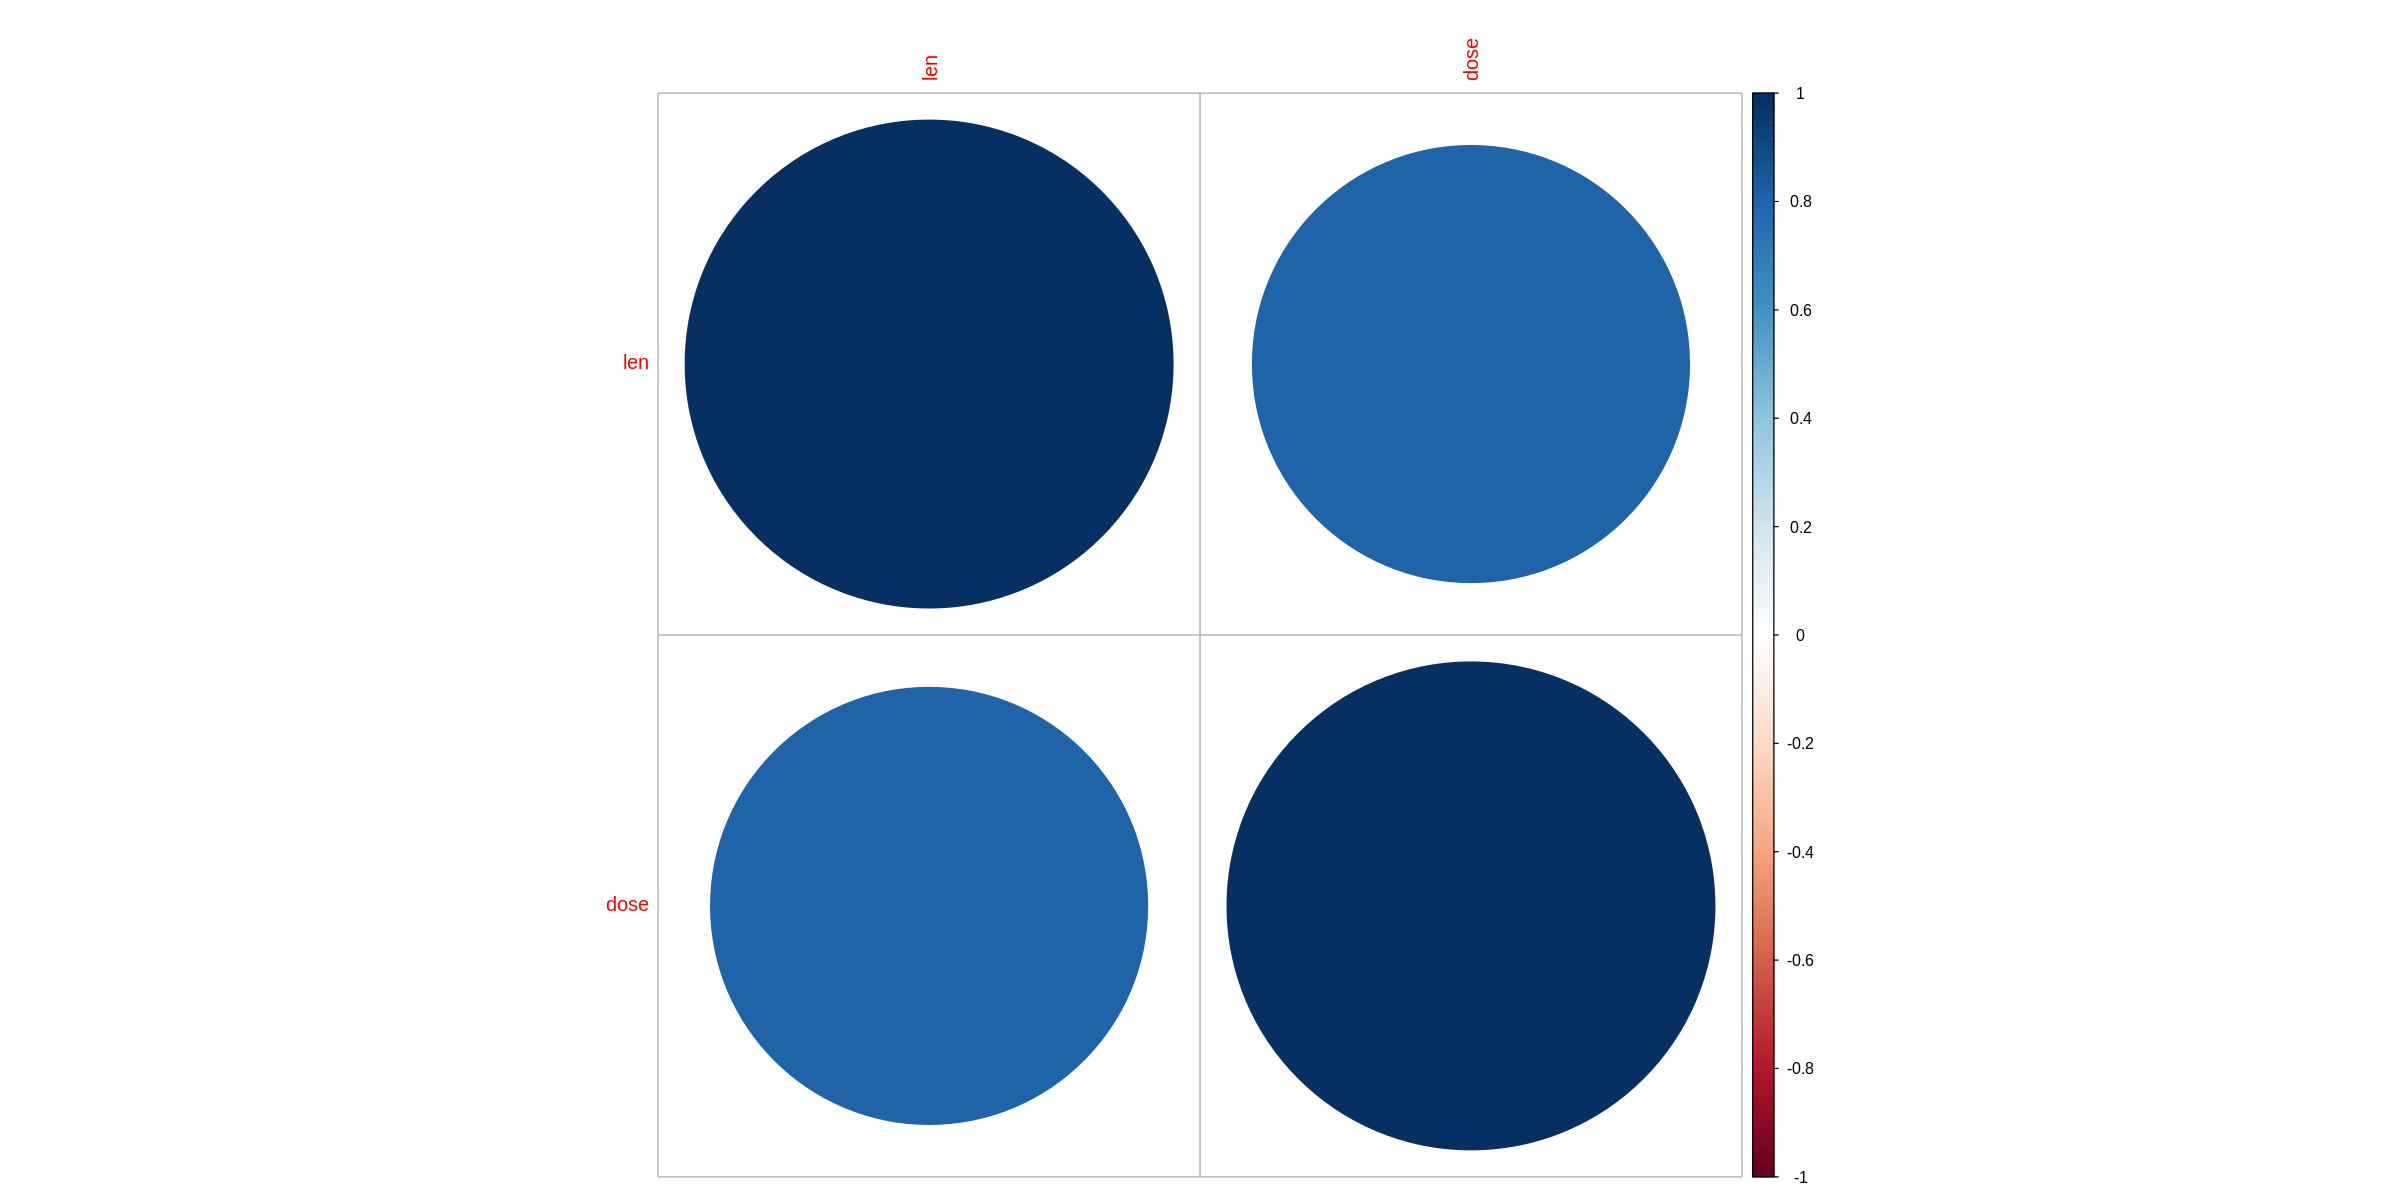

In [28]:
# Correlação entre as variáveis numéricas
corrplot(cor(df[c('len','dose')]))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


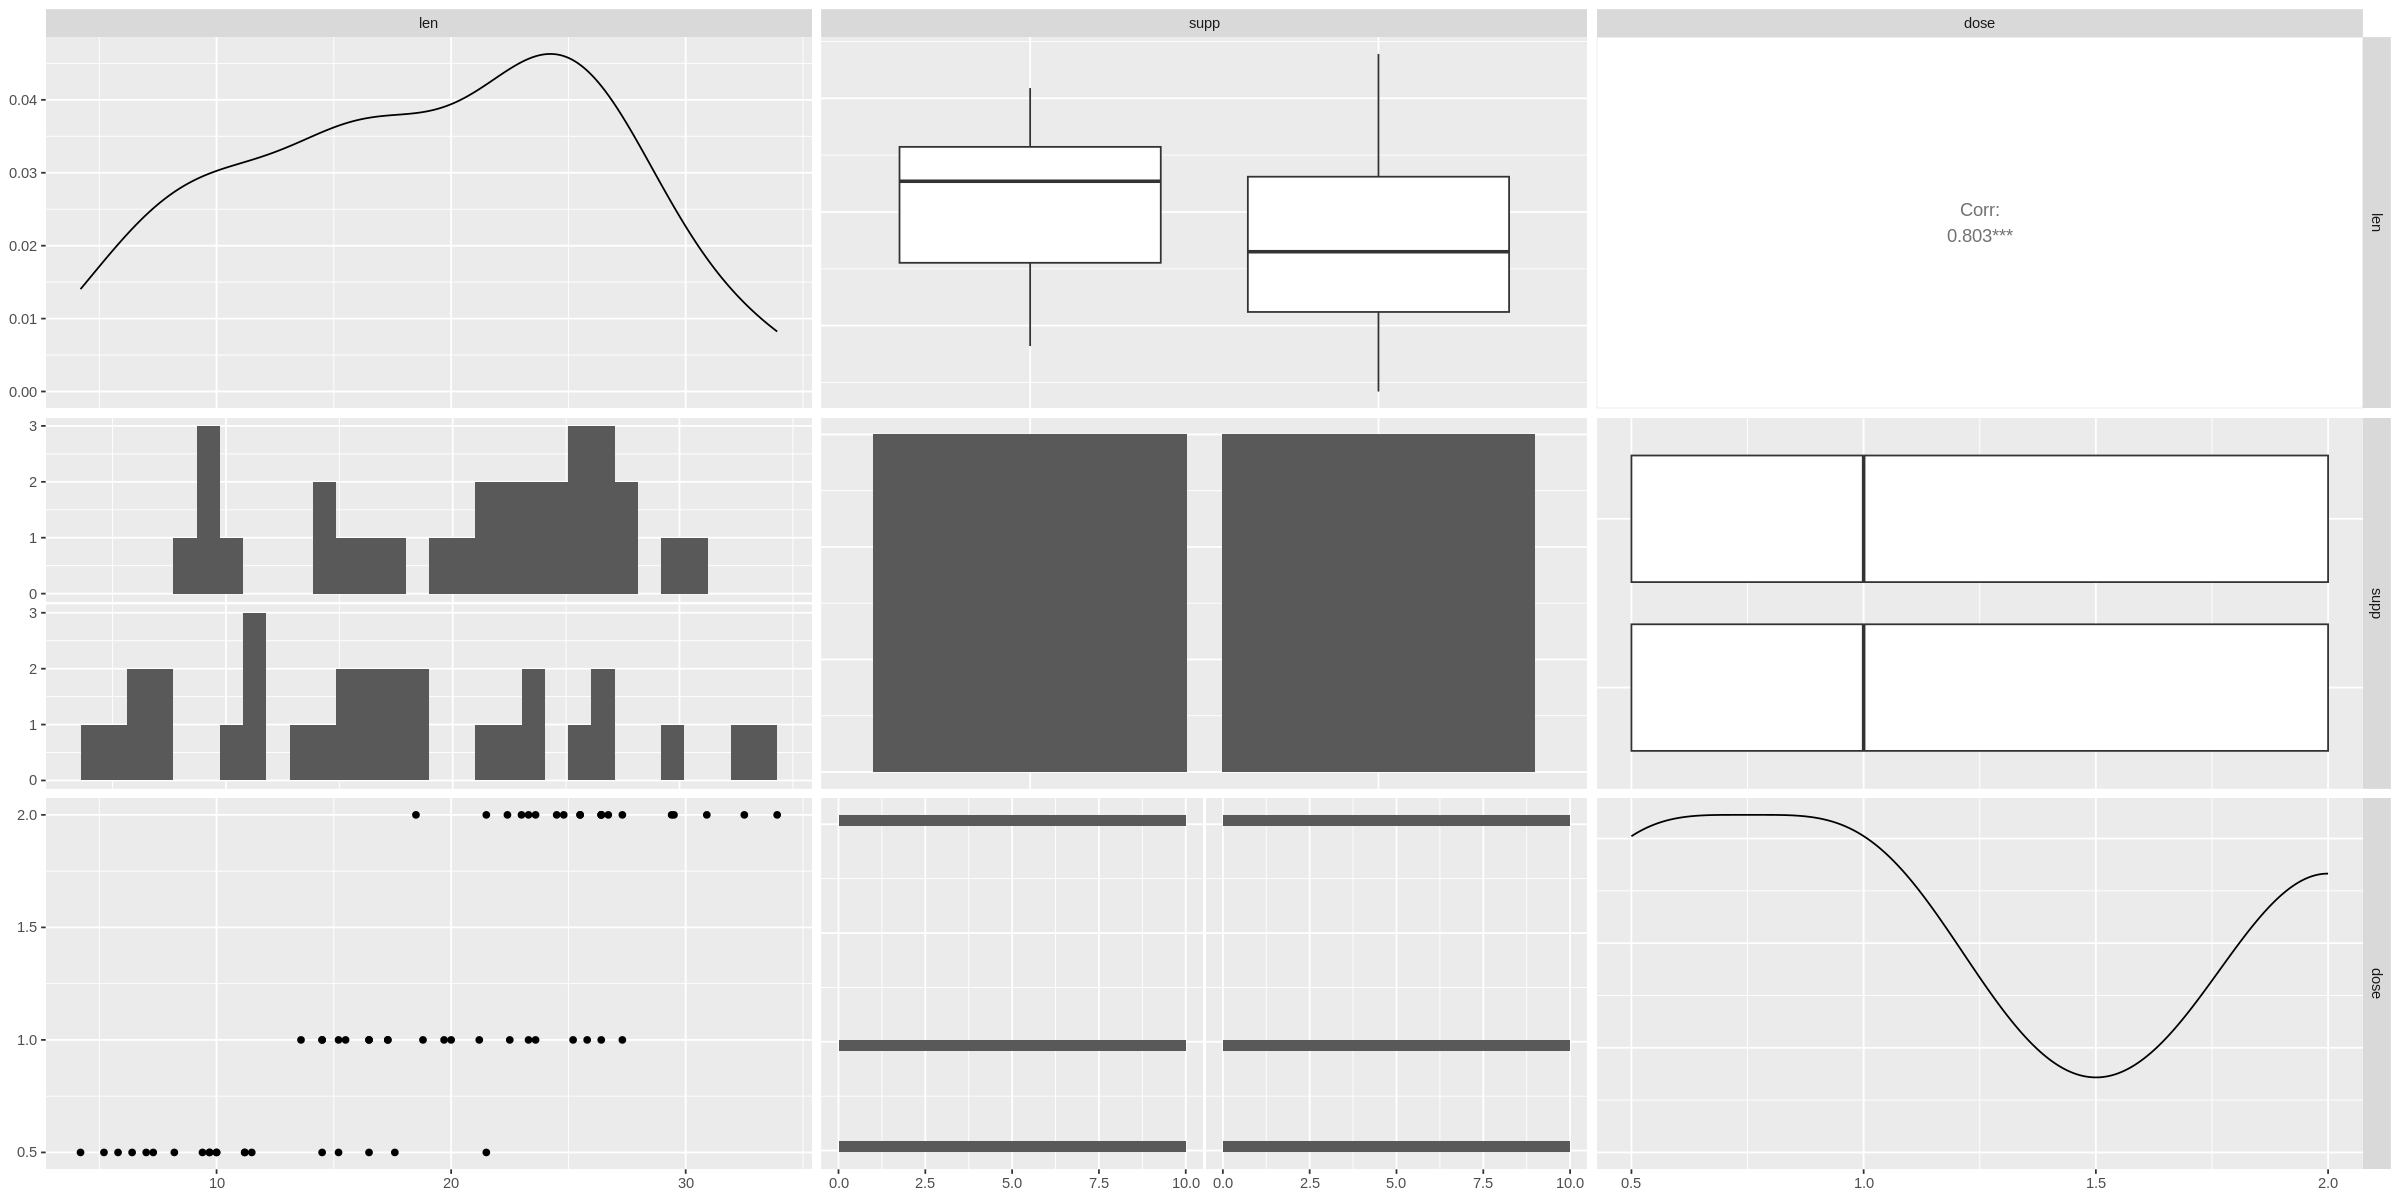

In [30]:
# Combinação de relação das variáveis
ggpairs(df)

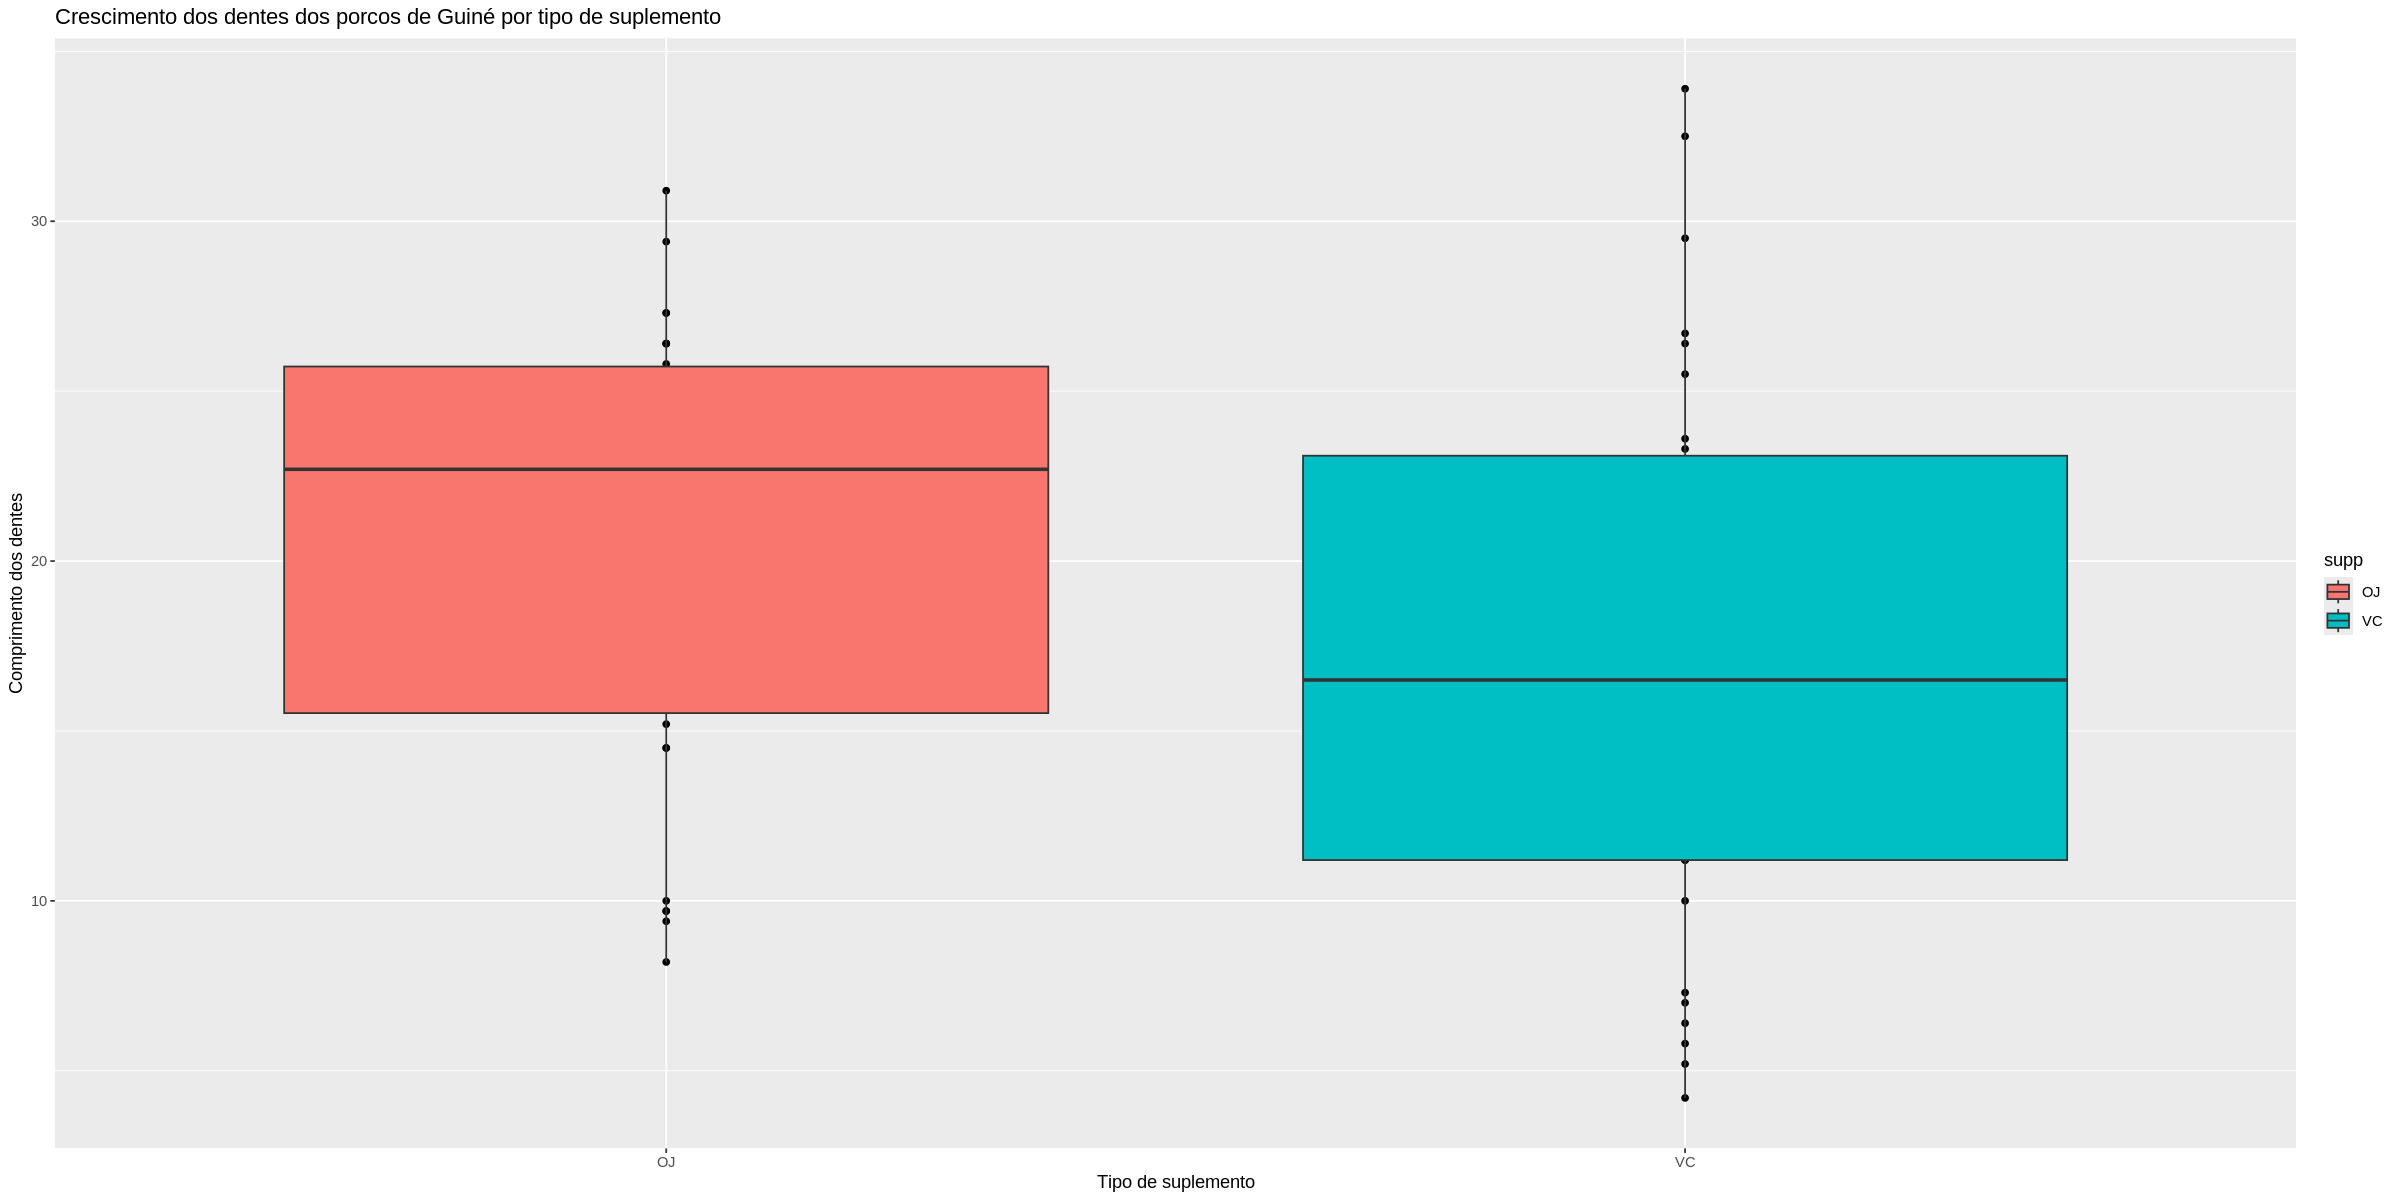

In [32]:
# Boxplot
qplot(supp,
      len,
      data = df,
      main = 'Crescimento dos dentes dos porcos de Guiné por tipo de suplemento',
      xlab = 'Tipo de suplemento',
      ylab = 'Comprimento dos dentes') +
geom_boxplot(aes(fill = supp))

Nota-se que aparemente a mediana do suplemente `OJ` é superior ao `vc`. Mas, verificaremos se há essa diferença com os testes estatísticos. Antes, será analisado se a variável `len` segue uma distribuição normal (a maioria dos testes tem como suposições que os dados sejam normais).

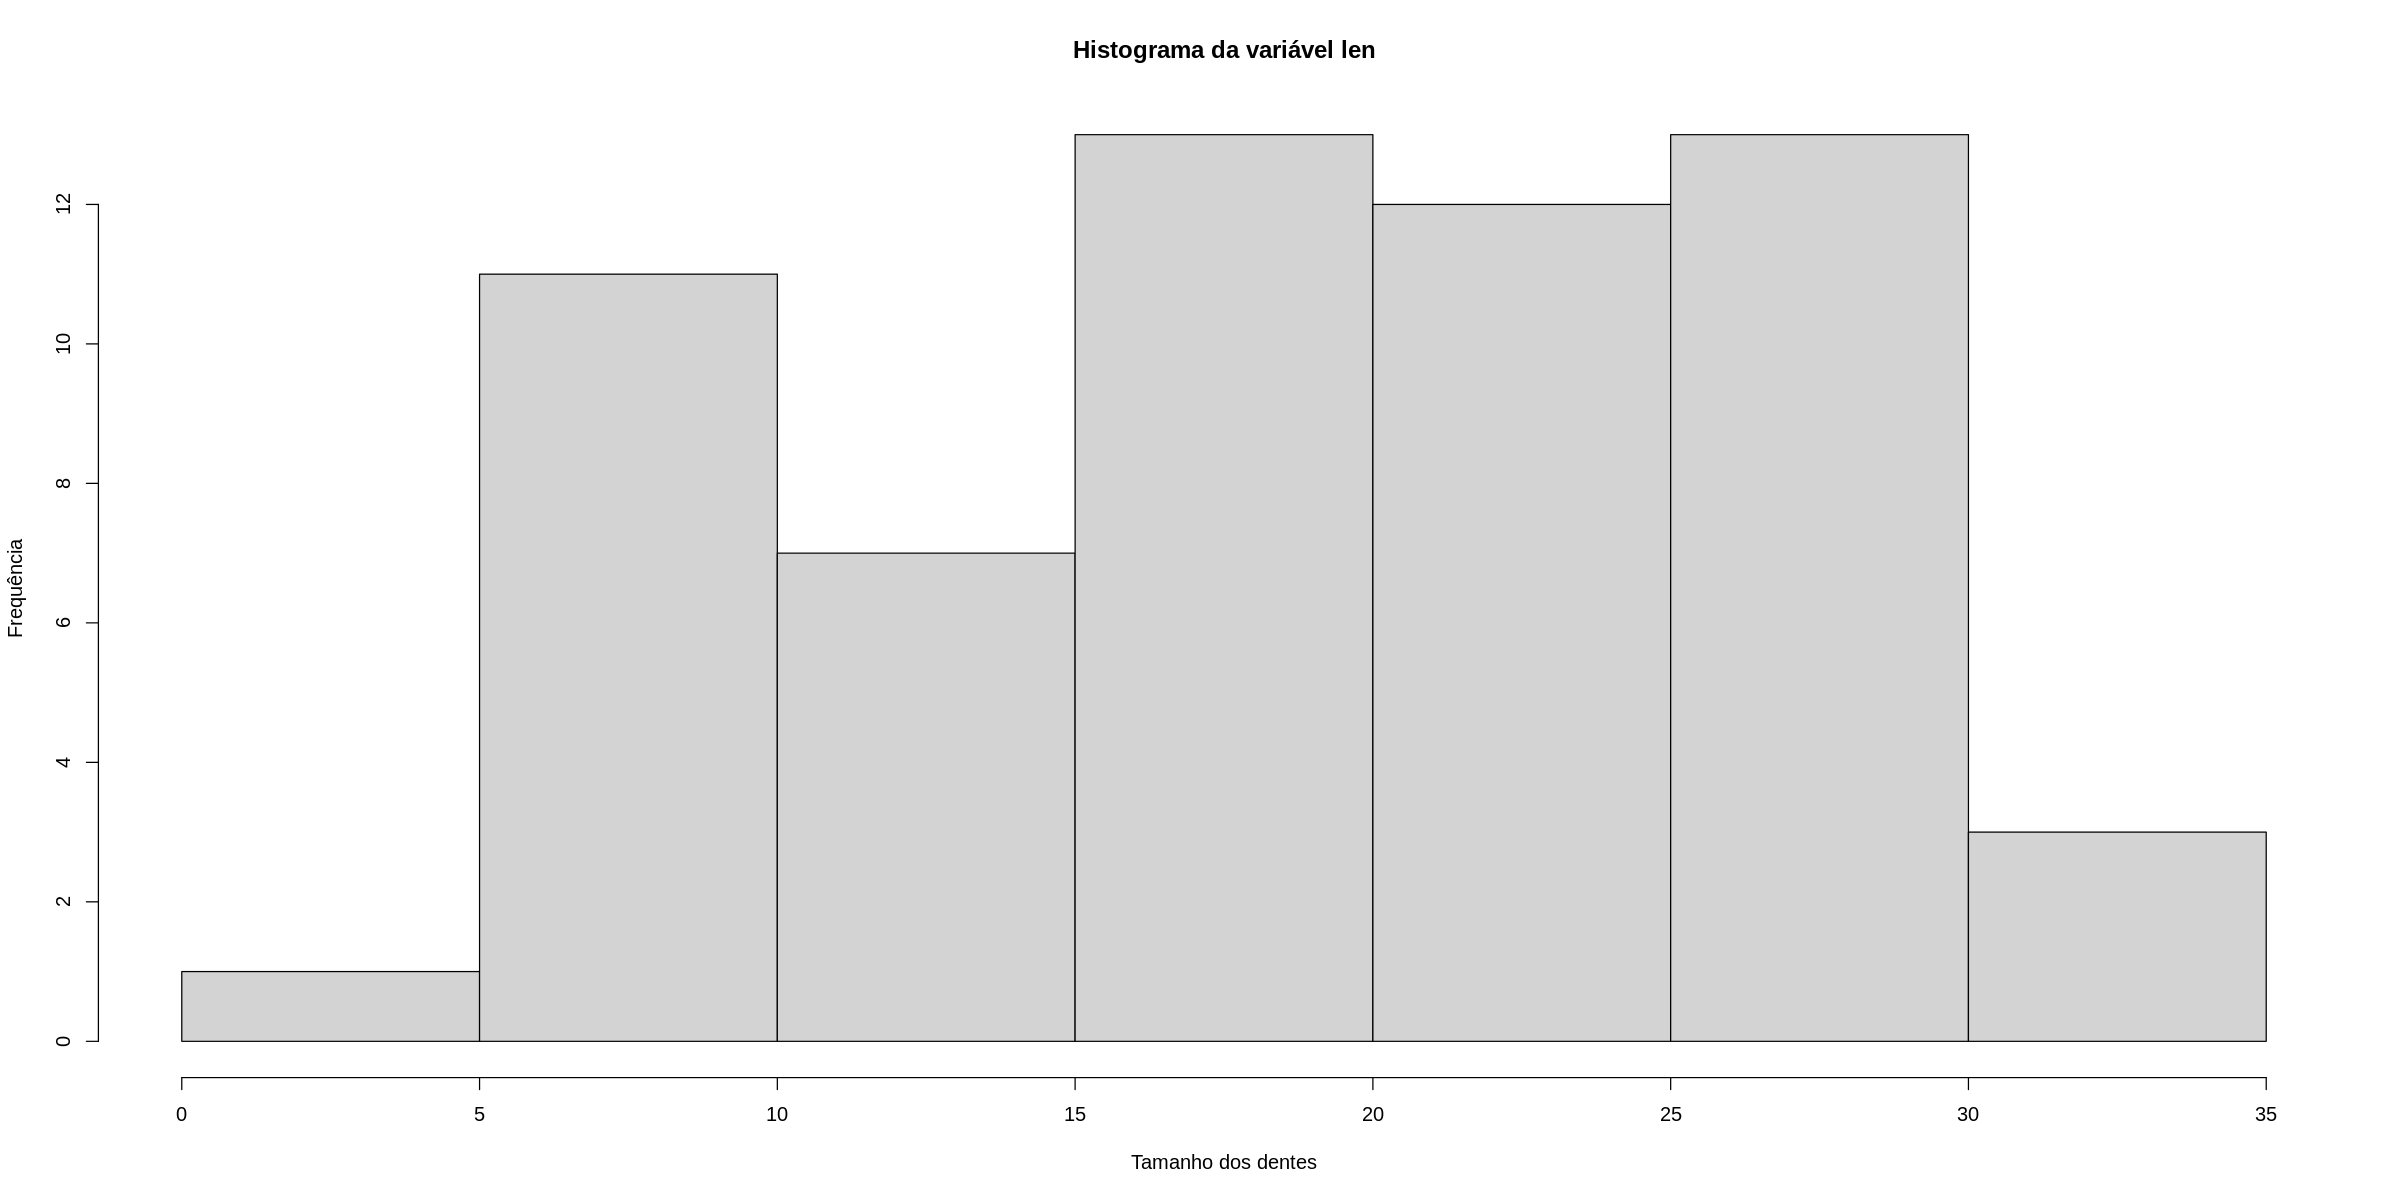

In [34]:
# Analisando o histograma da variável 'len'
hist(df$len,
      main = 'Histograma da variável len',
      xlab = 'Tamanho dos dentes',
      ylab = 'Frequência')

Aparemente, segue uma distribuição normal. No entanto, somente o teste estatístico para comprovar.


---

Aplicar o teste t de amostras independentes a fim de verificar se os tipos de suplementos tem impacto no crescimento dos dentes dos porcos.

- H0: Não há diferença significativa entre as médias dos dois grupos;
- H1: Há diferença significativa entre as médias dos dois grupos.

Validação de suposições:
1. Os dados são aleatórios e representativos da população;
2. A variável dependente é contínua;
3. Ambos os grupos são independentes (exaustivos e excludentes);
4. Os resíduos do modelo são normalmente distribuídos;
5. A variância residual é homogênea (princípio da homocedastidade).

Para as suposições 4 usaremos o teste de Shapiro-Wilk e para a 5 o teste F.


In [36]:
# Teste F
# H0: As médias de dados extraídos de uma população normalmente distribuídas tem a mesma variância
# H1: As médias de dados extraídos de uma população normalmente distribuídas NÃO tem a mesma variância

var.test(len ~ supp, data = df)


	F test to compare two variances

data:  len by supp
F = 0.6, num df = 29, denom df = 29, p-value = 0.2
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3 1.3
sample estimates:
ratio of variances 
              0.64 


Como o p-value > 0.05, então, não temos evidências o suficiente para rejeitar H0. Logo, os dados possuem a mesma variância.

In [38]:
table(df$supp)


OJ VC 
30 30 

In [41]:
# Shapiro-Wilk
# H0: Os dados são normalmentes distribuídos (p<0.05)
# H1: Os dados não são normalmente distribuídos (p>0.05)
shapiro.test(df$len[df$supp == 'OJ'])
shapiro.test(df$len[df$supp == 'VC'])


	Shapiro-Wilk normality test

data:  df$len[df$supp == "OJ"]
W = 0.9, p-value = 0.02



	Shapiro-Wilk normality test

data:  df$len[df$supp == "VC"]
W = 1, p-value = 0.4


Nota-se que para o suplemento 'VC' os dados não são normalmente distribuídos (p>0.05). Logo, uma das suposições do teste t não foram satisfeitas, então não podemos dar continuidade. Se o teste t fosse continuado, o valor p-value > 0.05, logo, não rejeitamos H0 (Não há diferença significativa entre os dois grupos). No entanto, o boxplot demonstra que possivelmente há sim diferença!
Uma solução é usar um teste NÃO-PARAMÉTRICO (Não fazem suposições sobre os dados).


---

**Solução 02:** Será que a dosagem do suplemento é quem faz a diferença e não o tipo de suplemento? Portanto, aplicaremos o teste ANOVA para verificar se as dosagens dos tipos de suplementos é que causam impactos no crescimento dos dentes dos animais.

**Suposições:**
1. Dentro de cada amostra, as observações são amostradas aleatoriamente e independentemente umas das outras;
2. Cada amostra de grupo é extraída de uma população normalmente distribuída.

*Considerando a suposição 1 como verdadeira e testando a suposição 2*

In [46]:
# Dividindo o dataset em 3 grupos de acordo com a dosagem
dose_0_5 <- df$len[df$dose == 0.5]
dose_1_0 <- df$len[df$dose == 1]
dose_2_0 <- df$len[df$dose == 2]

In [47]:
# Verificando se os grupos são normalmente distribuídos
shapiro.test(dose_0_5)
shapiro.test(dose_1_0)
shapiro.test(dose_2_0)


	Shapiro-Wilk normality test

data:  dose_0_5
W = 0.9, p-value = 0.2



	Shapiro-Wilk normality test

data:  dose_1_0
W = 0.9, p-value = 0.2



	Shapiro-Wilk normality test

data:  dose_2_0
W = 1, p-value = 0.9


Como o p-value dos três grupos são maiores que 0.05, falhamos ao rejeitar H0. Portanto, os grupos possuem dados normalmente distribuídos.

In [51]:
# ANOVA
teste_anova <- aov(len ~ dose, data=df)

In [52]:
# Verificando o sumário do teste
summary(teste_anova)

            Df Sum Sq Mean Sq F value            Pr(>F)    
dose         1   2224    2224     105 0.000000000000012 ***
Residuals   58   1228      21                              
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Nota-se que a `dose` é estatisticamente significante para a a variável resposta `len`, ou seja, ela possui um efeito significante no comprimento dos dentes dos porcos de Guiné!

In [56]:
# Analisando a significância das variáveis com Regressão Linear
modelo_v1 <- lm(len ~ supp + dose, data=df)
summary(modelo_v1)


Call:
lm(formula = len ~ supp + dose, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-6.600 -3.700  0.373  2.116  8.800 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)    9.272      1.282    7.23 0.00000000131233453 ***
suppVC        -3.700      1.094   -3.38              0.0013 ** 
dose           9.764      0.877   11.14 0.00000000000000063 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.2 on 57 degrees of freedom
Multiple R-squared:  0.704,	Adjusted R-squared:  0.693 
F-statistic: 67.7 on 2 and 57 DF,  p-value: 0.000000000000000872


Concluí-se que o tipo de suplemento apresenta menor significância que a dose aplicada nos porcos de Guiné!